In [1]:
%matplotlib inline 
import pandas as pd 
import numpy as np
import seaborn as sns

# EDA(Exploratory Data Analysis) : 탐색적 데이터 분석 
### 주어진 데이터셋을 다양한 관점에서 살펴보고 탐색하면서 인사이트를 도출
### EDA는 공식이 없다 -> 시각적 방법으로 확인해서 찾아야함  

 ## col 항목
 ### 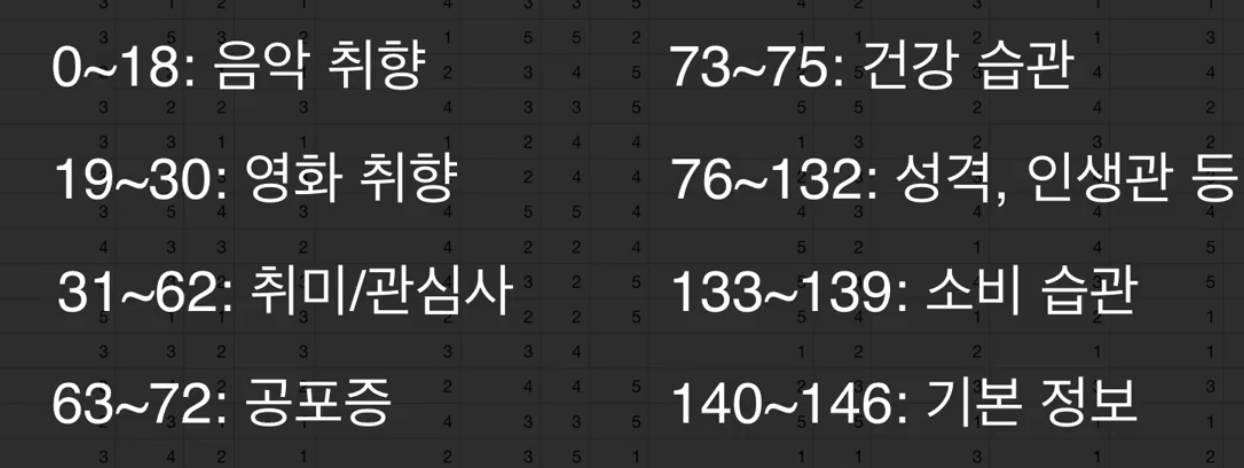

In [3]:
df = pd.read_csv('./data/young_survey.csv') 
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Handedness,Education
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right,bachelor's degree
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right,bachelor's degree
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right,high school
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,4.0,4,1.0,22.0,172.0,59.0,1.0,female,right,bachelor's degree
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,3.0,2,4.0,20.0,170.0,59.0,1.0,female,right,high school


In [7]:
basic_info = df.iloc[:, 140: ] 
basic_info.head()

,Age,Height,Weight,Number of siblings,Gender,Handedness,Education
0,20.0,163.0,48.0,1.0,female,right,bachelor's degree
1,19.0,163.0,58.0,2.0,female,right,bachelor's degree
2,20.0,176.0,67.0,2.0,female,right,high school
3,22.0,172.0,59.0,1.0,female,right,bachelor's degree
4,20.0,170.0,59.0,1.0,female,right,high school


In [8]:
basic_info.describe() #describe 메소드는 숫자로된 데이터를 통계적으로 분석해줌

,Age,Height,Weight,Number of siblings
count,997.000000,982.000000,981.000000,995.000000
mean,20.439318,173.610998,66.407747,1.300503
std,2.835443,9.373842,13.862403,1.015548
min,15.000000,148.000000,41.000000,0.000000
25%,19.000000,167.000000,55.000000,1.000000
50%,20.000000,173.000000,64.000000,1.000000
75%,22.000000,180.000000,75.000000,2.000000
max,30.000000,203.000000,165.000000,10.000000


In [9]:
#문자로된걸 찾아보기
basic_info['Gender'].value_counts()

female    587
male      405
Name: Gender, dtype: int64

In [10]:
basic_info['Handedness'].value_counts()

right    895
left      99
Name: Handedness, dtype: int64

In [11]:
basic_info['Education'].value_counts()

high school          618
bachelor's degree    207
middle school         78
master's degree       78
elementary school     10
doctorate degree       5
Name: Education, dtype: int64

<AxesSubplot: ylabel='Age'>

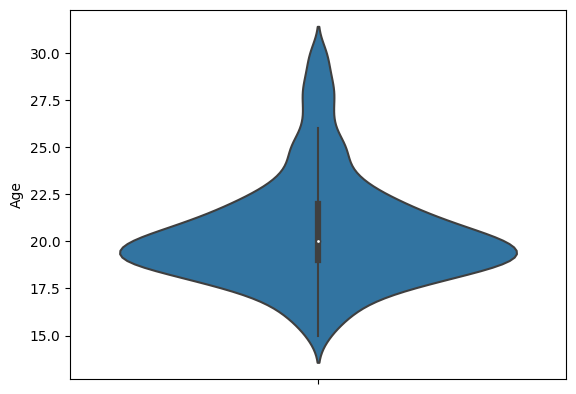

In [13]:
sns.violinplot(data= basic_info, y = 'Age')

<AxesSubplot: xlabel='Gender', ylabel='Age'>

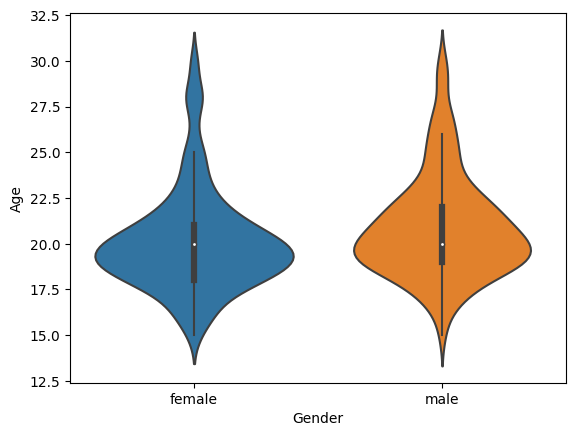

In [15]:
sns.violinplot(data= basic_info, x= 'Gender', y = 'Age')


<AxesSubplot: xlabel='Gender', ylabel='Age'>

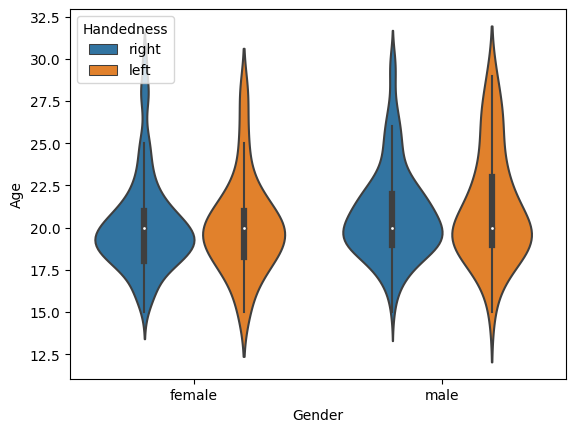

In [16]:
sns.violinplot(data= basic_info, x= 'Gender', y = 'Age', hue = 'Handedness')


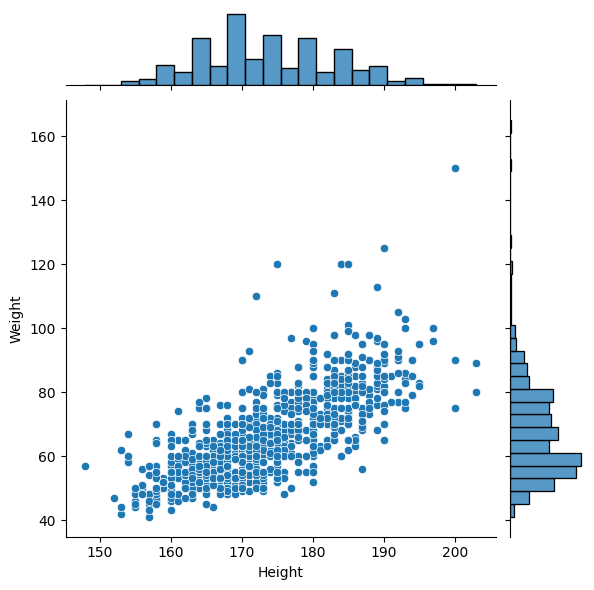

In [17]:
sns.jointplot(data = basic_info, x = 'Height', y = 'Weight')

# 03. 요즘 인기 직업은?

질문 1
30XP
occupations.csv 파일(다운로드)을 보고, 여성분들이 가장 많이 종사하고 있는 직종이 무엇인지 파악해 보세요.

상위 직종 3개를 골라 보세요.

In [24]:
df = pd.read_csv('./data/occupations.csv')
sel_df = df[['gender', 'occupation']]

In [27]:
women = df[df['gender'] == 'F'] 
women['occupation'].value_counts()

student          60
other            36
administrator    36
librarian        29
educator         26
writer           19
artist           13
healthcare       11
marketing        10
homemaker         6
programmer        6
none              4
executive         3
scientist         3
salesman          3
engineer          2
lawyer            2
entertainment     2
retired           1
technician        1
Name: occupation, dtype: int64

질문 2 같은 데이터로, 이번에는 남성분들이 가장 많이 종사하고 있는 직종 상위 3개를 고르세요.

In [28]:
men = df[df['gender'] == 'M']
men['occupation'].value_counts()

student          136
other             69
educator          69
engineer          65
programmer        60
administrator     43
executive         29
scientist         28
technician        26
writer            26
librarian         22
entertainment     16
marketing         16
artist            15
retired           13
lawyer            10
salesman           9
doctor             7
none               5
healthcare         5
homemaker          1
Name: occupation, dtype: int64

# 04. 상관 관계 분석 (Correlation Analysis)



In [32]:
df = pd.read_csv('./data/young_survey.csv') 
df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Handedness,Education
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right,bachelor's degree
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right,bachelor's degree
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right,high school
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,4.0,4,1.0,22.0,172.0,59.0,1.0,female,right,bachelor's degree
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,3.0,2,4.0,20.0,170.0,59.0,1.0,female,right,high school
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,3,4.0,20.0,164.0,57.0,1.0,female,right,high school
993,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,1.0,5,3.0,27.0,183.0,80.0,5.0,male,left,master's degree
994,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,2.0,2,5.0,18.0,173.0,75.0,0.0,female,right,high school
995,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,3.0,3,3.0,25.0,173.0,58.0,1.0,female,right,bachelor's degree


In [35]:
music = df.iloc[:, :19]
music.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera
count,994.000000,995.000000,993.000000,992.000000,992.000000,990.000000,995.000000,994.000000,991.000000,994.000000,989.000000,993.000000,990.000000,991.000000,990.000000,990.000000,989.000000,990.000000,996.000000
mean,4.737425,3.334673,3.115811,2.293347,2.121976,2.956566,2.767839,3.476861,3.769929,2.367203,2.458038,2.907351,2.775758,2.758829,3.152525,2.832323,2.846309,2.336364,2.143574
std,0.650716,0.830477,1.169023,1.140767,1.079224,1.253965,1.258920,1.157300,1.182167,1.374846,1.299918,1.376457,1.215928,1.257447,1.235623,1.345391,1.329606,1.325259,1.187231
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<AxesSubplot: >

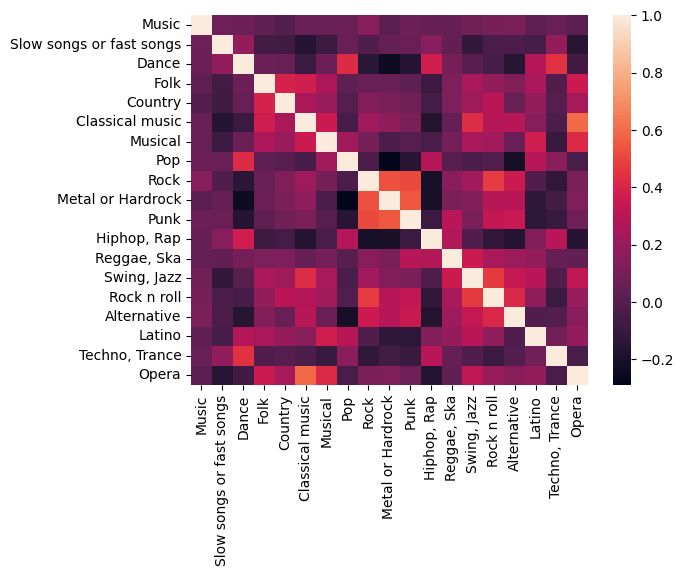

In [38]:
sns.heatmap(music.corr())
#진할수록연관성이 거의 없는 것 

In [39]:
df.corr()

/var/folders/5v/qstscrlx4tsddzht4m9xgdcm0000gn/T/ipykernel_95908/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
Music,1.000000,0.075426,0.066719,0.027648,-0.014272,0.055648,0.056730,0.059967,0.149958,0.016043,...,0.093707,0.016673,0.043828,0.091142,0.014790,0.073037,-0.078058,-0.068002,-0.128233,-0.011585
Slow songs or fast songs,0.075426,1.000000,0.188217,-0.062023,-0.072138,-0.159021,-0.078479,0.054375,-0.018347,0.050913,...,0.064778,0.002680,0.106225,0.024667,0.036608,-0.027398,0.010998,0.106873,0.125870,0.002352
Dance,0.066719,0.188217,1.000000,0.065863,0.055106,-0.093125,0.067430,0.424794,-0.147867,-0.241477,...,0.189977,0.053353,0.078635,0.184652,0.078517,0.026210,0.031215,-0.012681,0.014024,0.003952
Folk,0.027648,-0.062023,0.065863,1.000000,0.391850,0.366988,0.263987,0.023641,0.056471,0.062454,...,-0.069797,-0.129808,-0.099580,-0.121036,-0.155832,-0.013442,0.132414,-0.076549,-0.013412,0.089963
Country,-0.014272,-0.072138,0.055106,0.391850,1.000000,0.257474,0.202831,0.000716,0.129917,0.115289,...,-0.071510,-0.057090,-0.065920,-0.095447,0.000729,0.007146,0.074586,0.024685,0.073452,0.035615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Spending on healthy eating,0.073037,-0.027398,0.026210,-0.013442,0.007146,0.077416,0.064933,-0.025233,0.030247,-0.005333,...,0.106373,0.178066,0.148477,0.237851,0.243666,1.000000,0.015248,0.019720,0.029572,-0.082342
Age,-0.078058,0.010998,0.031215,0.132414,0.074586,0.035176,0.014553,0.020440,-0.000670,0.004109,...,-0.133800,-0.066627,-0.032284,-0.073129,-0.012082,0.015248,1.000000,0.122711,0.238893,0.089174
Height,-0.068002,0.106873,-0.012681,-0.076549,0.024685,-0.005057,-0.240144,-0.133551,-0.024931,0.116562,...,-0.136491,0.146116,0.165349,-0.089903,0.235986,0.019720,0.122711,1.000000,0.735923,-0.005442
Weight,-0.128233,0.125870,0.014024,-0.013412,0.073452,0.010132,-0.152645,-0.093742,0.007529,0.168364,...,-0.151023,0.101246,0.141377,-0.085356,0.244790,0.029572,0.238893,0.735923,1.000000,-0.026374


In [41]:
df.corr()['Age'].sort_values(ascending=False) #-> Weigh와 Age가 가장 연관성이 높다. 

/var/folders/5v/qstscrlx4tsddzht4m9xgdcm0000gn/T/ipykernel_95908/1388588112.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Age'].sort_values(ascending=False)


Age                        1.000000
Weight                     0.238893
Elections                  0.212319
Prioritising workload      0.156256
Reliability                0.148141
                             ...   
Mood swings               -0.111890
Getting up                -0.119888
Questionnaires or polls   -0.128187
Shopping centres          -0.133800
Changing the past         -0.146895
Name: Age, Length: 139, dtype: float64

# 05. 브런치 카페 음악 셀렉션

### 질문 1
30XP
대위는 신촌에서 대학생들을 대상으로 브런치 카페를 운영합니다.

손님들의 취향에 딱 맞는 음악을 틀고 싶은데요. 브런치 카페이기 때문에, 일찍 일어나는 사람들이 좋아할 만한 음악이 무엇인지 분석해 보려고 합니다.

주어진 데이터(다운로드)의 “Getting up”이라는 column을 보면 사람들이 아침에 일어나는 걸 얼마나 어려워하는지 알 수 있습니다. 5라고 대답한 사람들은 아침에 일어나는 걸 아주 어려워 하는 사람들이고, 1이라고 대답한 사람들은 아침에 쉽게 일어난다는 거죠.

이 데이터로 봤을 때, 아침에 일찍 일어나는 사람들이 가장 좋아할 만한 음악 장르는 무엇인가요?

In [78]:
df = pd.read_csv('./data/young_survey.csv') 

df.corr()['Getting up'][1:19].sort_values(ascending=True)

/var/folders/5v/qstscrlx4tsddzht4m9xgdcm0000gn/T/ipykernel_95908/2268049318.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Getting up'][1:19].sort_values(ascending=True)


Opera                      -0.071819
Slow songs or fast songs   -0.052613
Folk                       -0.049612
Punk                       -0.029189
Metal or Hardrock          -0.026769
Country                    -0.025315
Latino                     -0.015060
Reggae, Ska                -0.008434
Musical                     0.011869
Classical music             0.014285
Swing, Jazz                 0.019556
Techno, Trance              0.019863
Dance                       0.027249
Alternative                 0.027540
Rock n roll                 0.028889
Hiphop, Rap                 0.038980
Pop                         0.079101
Rock                        0.105245
Name: Getting up, dtype: float64

# 06. 스타트업 아이템 탐색하기

질문 1
30XP
경영학과 3학년이 된 영준이는 스타트업을 준비하고 있습니다.
사업 아이템을 고민하면서, 나름대로 가설을 몇 개 세워봤습니다.

악기를 다루는 사람들은 시 쓰기를 좋아하는 경향이 있을 것이다.
외모에 돈을 많이 투자하는 사람들은 브랜드 의류를 선호할 것이다.
메모를 자주 하는 사람들은 새로운 환경에 쉽게 적응할 것이다.
워커홀릭들은 건강한 음식을 먹으려는 경향이 있을 것이다.
이 내용을 사업 아이템으로 확장하기 전에, 데이터를 통해 가설을 검증해보려고 하는데요.  
설문조사 데이터(다운로드)를 바탕으로, 가장 가능성이 낮은 가설을 골라보세요.

이 가설과 관련이 있는 column은 다음과 같습니다.

Branded clothing: 나는 브랜드가 없는 옷보다 브랜드가 있는 옷을 선호한다.
Healthy eating: 나는 건강하거나 품질이 좋은 음식에는 기쁘게 돈을 더 낼 수 있다.
Musical instruments: 나는 악기 연주에 관심이 많다.
New environment: 나는 새 환경에 잘 적응하는 편이다.
Prioritising workload: 나는 일을 미루지 않고 즉시 해결해버리려고 한다.
Spending on looks: 나는 내 외모에 돈을 많이 쓴다.
Workaholism: 나는 여가 시간에 공부나 일을 자주 한다.
Writing: 나는 시 쓰기에 관심이 많다.
Writing notes: 나는 항상 메모를 한다.

In [87]:
df = pd.read_csv('./data/young_survey.csv')

#악기를 다루는 사람들은 시 쓰기를 좋아하는 경향이 있을 것이다.
df[['Musical instruments', 'Writing']].corr()



,Workaholism,Healthy eating
Workaholism,1.000000,0.238644
Healthy eating,0.238644,1.000000


In [88]:

#외모에 돈을 많이 투자하는 사람들은 브랜드 의류를 선호할 것이다.
df[['Spending on looks', 'Branded clothing']].corr()

,Spending on looks,Branded clothing
Spending on looks,1.000000,0.418399
Branded clothing,0.418399,1.000000


In [89]:

#메모를 자주 하는 사람들은 새로운 환경에 쉽게 적응할 것이다.
df[['Writing notes', 'New environment']].corr()

,Writing notes,New environment
Writing notes,1.000000,-0.079397
New environment,-0.079397,1.000000


In [90]:

#워커홀릭들은 건강한 음식을 먹으려는 경향이 있을 것이다.
df[['Workaholism', 'Healthy eating']].corr()

,Workaholism,Healthy eating
Workaholism,1.000000,0.238644
Healthy eating,0.238644,1.000000


정답예시

In [92]:
df.corr().loc['Musical instruments', 'Writing']

/var/folders/5v/qstscrlx4tsddzht4m9xgdcm0000gn/T/ipykernel_95908/76931459.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().loc['Musical instruments', 'Writing']


0.3438162143904336

# 07. 클러스터 분석 (Cluster Analysis) 
### 클러스터란 : 무리라는 의미 

In [93]:
interest = df.loc[:, 'History' : 'Pets']
interest

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,...,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets
0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,...,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0
1,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,...,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0
2,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,...,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0
3,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,3.0,...,1.0,1.0,1.0,2.0,4.0,3.0,1.0,2.0,1.0,1.0
4,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,...,3.0,1.0,4.0,3.0,3.0,3.0,2.0,4.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,4.0,4.0,2.0,1.0,2.0,4.0,3.0,1.0,2.0,1.0,...,4.0,4.0,2.0,4.0,5.0,3.0,5.0,5.0,4.0,4.0
993,4.0,1.0,1.0,5.0,4.0,5.0,5.0,2.0,2.0,1.0,...,1.0,5.0,5.0,1.0,2.0,5.0,1.0,5.0,1.0,5.0
994,2.0,3.0,3.0,3.0,1.0,3.0,4.0,1.0,1.0,1.0,...,2.0,2.0,1.0,1.0,2.0,3.0,2.0,3.0,1.0,5.0
995,3.0,5.0,3.0,1.0,1.0,5.0,4.0,3.0,3.0,3.0,...,2.0,4.0,1.0,3.0,5.0,5.0,5.0,5.0,1.0,4.0


In [95]:
corr = interest.corr()
corr

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,...,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets
History,1.000000,0.281493,0.400845,0.008328,0.079638,0.022010,0.027346,0.054872,0.014807,0.014117,...,-0.013262,0.064929,0.033196,-0.087338,-0.061804,0.135597,0.185301,0.024960,0.061201,0.031920
Psychology,0.281493,1.000000,0.195338,0.043030,0.065774,0.000075,-0.077712,0.087072,0.202913,0.058541,...,-0.083949,0.006261,0.042099,-0.012857,0.058210,0.060809,0.268484,0.020027,0.058522,0.053322
Politics,0.400845,0.195338,1.000000,0.104033,0.130293,0.058863,0.088846,0.304575,-0.090532,-0.058849,...,0.042173,0.069026,-0.018266,-0.023371,-0.064327,0.186743,0.085306,0.009968,0.090355,-0.055446
Mathematics,0.008328,0.043030,0.104033,1.000000,0.595188,0.157779,0.295564,0.218796,0.078043,0.181953,...,0.055701,0.083826,0.031867,-0.111193,-0.156334,0.249863,-0.018890,-0.030492,0.098004,-0.031633
Physics,0.079638,0.065774,0.130293,0.595188,1.000000,0.103793,0.339429,0.010678,0.212261,0.322827,...,0.016199,0.118929,0.047723,-0.211790,-0.227379,0.430393,0.001382,-0.029794,0.146055,-0.022982
Internet,0.022010,0.000075,0.058863,0.157779,0.103793,1.000000,0.467867,0.164447,-0.101429,-0.107657,...,0.171394,0.009498,-0.049947,0.114478,0.086552,0.190400,-0.149085,0.108927,0.072552,0.006894
PC,0.027346,-0.077712,0.088846,0.295564,0.339429,0.467867,1.000000,0.155285,-0.083648,-0.042937,...,0.080169,0.127505,-0.005789,-0.050504,-0.162955,0.420528,-0.177682,0.004907,0.154008,-0.066745
Economy Management,0.054872,0.087072,0.304575,0.218796,0.010678,0.164447,0.155285,1.000000,-0.173794,-0.180850,...,0.049986,0.071795,-0.045067,0.090132,0.111786,0.060767,-0.009515,0.066244,0.126719,-0.061738
Biology,0.014807,0.202913,-0.090532,0.078043,0.212261,-0.101429,-0.083648,-0.173794,1.000000,0.689980,...,-0.011216,0.055579,0.268927,0.012611,0.090339,0.151654,0.168296,0.013397,0.039657,0.169852
Chemistry,0.014117,0.058541,-0.058849,0.181953,0.322827,-0.107657,-0.042937,-0.180850,0.689980,1.000000,...,-0.041194,0.042481,0.200144,-0.083627,0.002447,0.195571,0.098171,-0.024690,0.035784,0.106649


In [97]:
corr['History'].sort_values(ascending=False)
#History와 연관해 관심있는 분야를 차례대로 보여줌 

History                   1.000000
Politics                  0.400845
Geography                 0.327354
Law                       0.298363
Psychology                0.281493
Reading                   0.262948
Religion                  0.203840
Art exhibitions           0.200643
Theatre                   0.185301
Writing                   0.164617
Foreign languages         0.145471
Science and technology    0.135597
Musical instruments       0.107279
Countryside, outdoors     0.096609
Physics                   0.079638
Active sport              0.064929
Adrenaline sports         0.061201
Economy Management        0.054872
Cars                      0.050644
Medicine                  0.040023
Gardening                 0.033196
Dancing                   0.032925
Pets                      0.031920
PC                        0.027346
Fun with friends          0.024960
Internet                  0.022010
Biology                   0.014807
Chemistry                 0.014117
Mathematics         

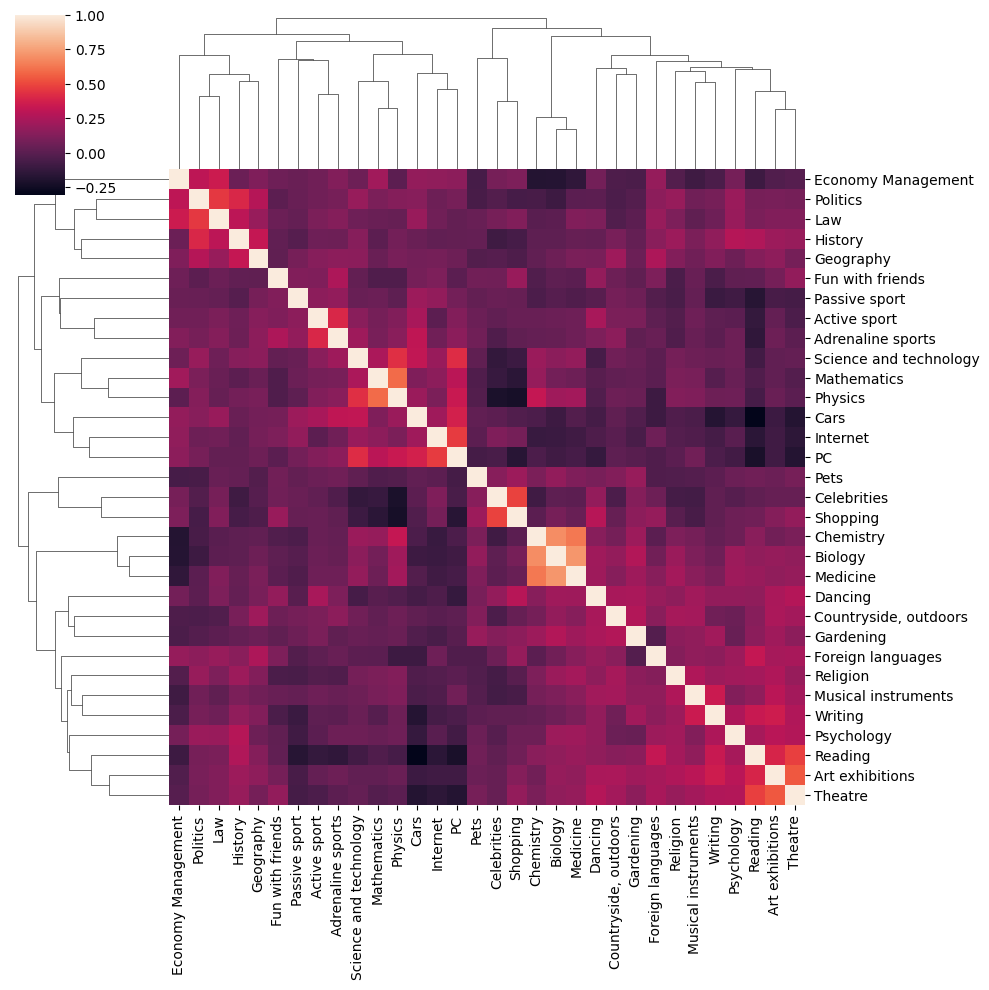

In [98]:
#clustermap plot을 통해 연관성있는 관심사끼리 묶을 수 있음 
sns.clustermap(corr)

# 08. 영화 카페 운영하기

실습 설명
음악 선곡을 잘해서 대위의 브런치 카페는 대박이 났습니다. 그런데 브런치 카페이다 보니 저녁 시간대에는 가게가 텅텅 빌 수밖에 없죠.

고민 끝에, 저녁에는 가게를 영화 카페로 변신시켜 볼까 하는데요. 우선 수 많은 영화 DVD를 어떻게 배치해야 할지 고민입니다. 좀 연관된 장르끼리 묶어서 보관해야, 각 손님들의 취향을 잘 맞출 수 있을 것 같습니다.

이번에도 대박을 위해서 데이터의 도움을 최대한 빌리려고 합니다.

주어진 데이터셋에서 영화 장르에 대한 column은 'Horror'부터 'Action'까지 입니다. 영화 장르에 대해서 clustermap을 그려 보세요.

In [101]:
%matplotlib inline
import pandas as pd
import seaborn as sns

df = pd.read_csv('./data/survey.csv')
df

# 여기에 코드를 작성하세요

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Handedness,Education
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right,bachelor's degree
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right,bachelor's degree
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right,high school
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,4.0,4,1.0,22.0,172.0,59.0,1.0,female,right,bachelor's degree
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,3.0,2,4.0,20.0,170.0,59.0,1.0,female,right,high school
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,3,4.0,20.0,164.0,57.0,1.0,female,right,high school
993,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,1.0,5,3.0,27.0,183.0,80.0,5.0,male,left,master's degree
994,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,2.0,2,5.0,18.0,173.0,75.0,0.0,female,right,high school
995,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,3.0,3,3.0,25.0,173.0,58.0,1.0,female,right,bachelor's degree


In [105]:
movie = df.loc[:, 'Horror': 'Action']
corr = movie.corr()

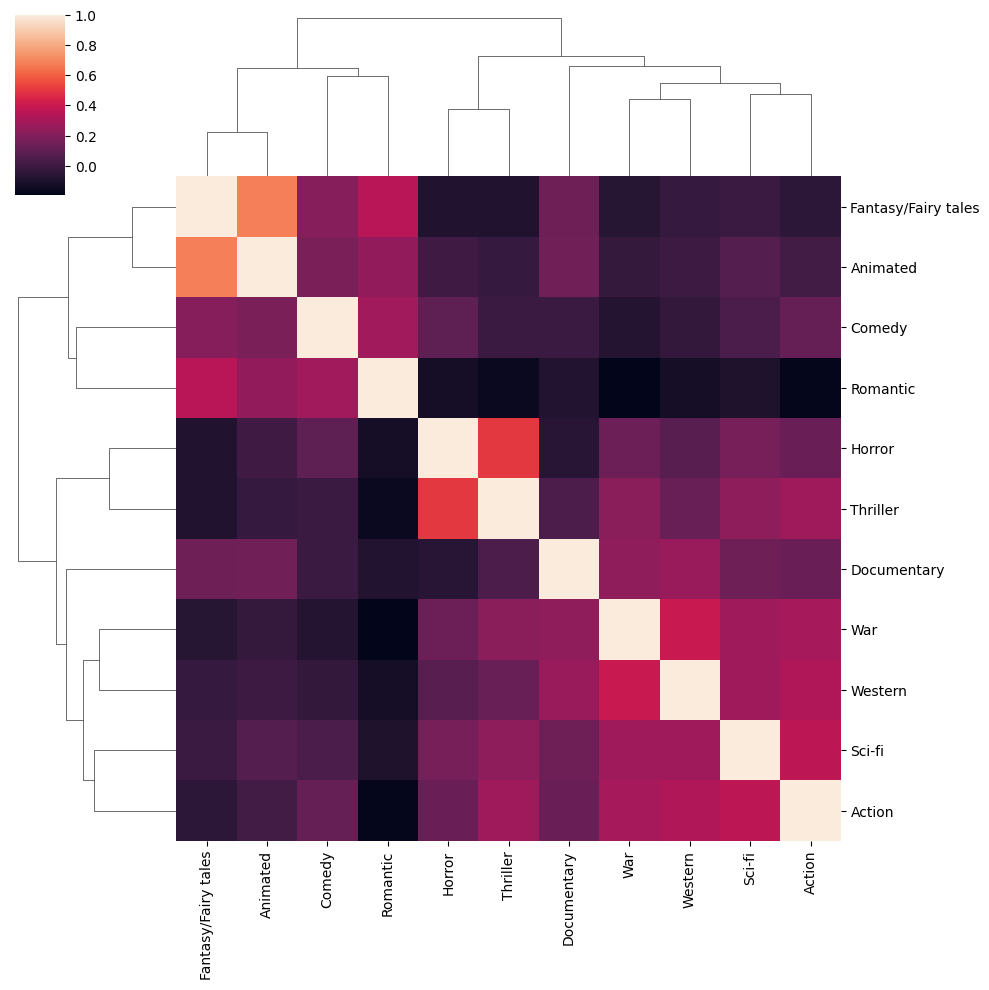

In [106]:
sns.clustermap(corr)

# 10. 타이타닉 EDA

질문 1
30XP
RMS 타이타닉은 1912년에 빙산과 충돌해 침몰한 여객선입니다. 타이타닉호의 침몰은 무려 1514명 정도가 사망한 비운의 사건이죠. 영화 ‘타이타닉’으로 인해 이름이 가장 널리 알려진 여객선이기도 합니다.

우리에게 주어진 titanic.csv 파일(다운로드)에는 당시 탑승자들의 정보가 담겨 있습니다. 생존 여부, 성별, 나이, 지불한 요금, 좌석 등급 등의 정보가 있는데요.

생존 여부는 'Survived' column에 저장되어 있습니다. 0이 사망, 1이 생존을 의미합니다.
좌석 등급은 'Pclass' column에 저장되어 있습니다. 1은 1등실, 2는 2등실, 3은 3등실을 의미합니다.
지불한 요금은 'Fare' column에 저장되어 있습니다.
다양한 방면으로 EDA(탐색적 데이터 분석)를 한 후, 다음 보기 중 맞는 것을 모두 고르세요.



In [221]:
df = pd.read_csv('./data/titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [222]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. 타이타닉의 승객은 30대와 40대가 가장 많다.

In [124]:
age_df = df['Age'].sort_values() 
df['Age'].value_counts().head(10) #-> 20대가 제일 상위권을 가지고 있음 

24.0    30
22.0    27
18.0    26
19.0    25
28.0    25
30.0    25
21.0    24
25.0    23
36.0    22
29.0    20
Name: Age, dtype: int64

<AxesSubplot: ylabel='Frequency'>

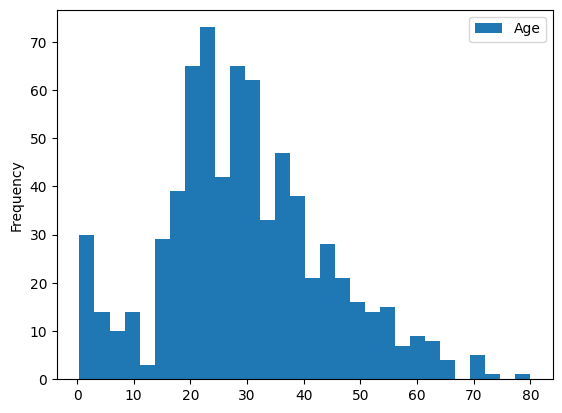

In [225]:
df.plot(kind='hist', y='Age', bins=30) #-> 승객은 20대와 30대가 가장많은 것을 알 수 있다.

가장 높은 요금을 낸 사람은 30대이다.

In [128]:
df.sort_values(by = 'Fare', ascending = False) #30대[35세 2명 ,36세 1명]가 512.3292 달러를 냈다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S


<AxesSubplot: xlabel='Age', ylabel='Fare'>

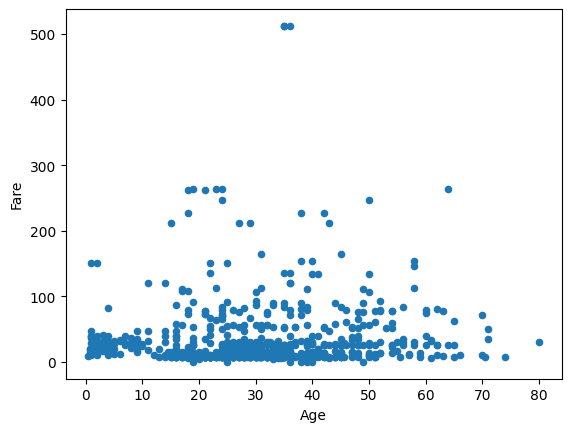

In [226]:
df.plot(kind='scatter', x='Age', y='Fare') #30대가 제일 돈을 많이 낸 것을 알 수 있다.

생존자가 사망자보다 더 많다.

In [129]:
df['Survived'].value_counts() #사망자수가 더 많다 0 : 549 > 1 : 342

0    549
1    342
Name: Survived, dtype: int64

1등실, 2등실, 3등실 중 가장 많은 사람이 탑승한 곳은 3등실이다.

In [130]:
df['Pclass'].value_counts() #3등실이 사람이 가장 많이 탔다. 

3    491
1    216
2    184
Name: Pclass, dtype: int64

가장 생존율이 높은 객실 등급은 1등실이다.

In [139]:
rates = df.loc[df['Survived'] == 1, 'Pclass'].value_counts() 
rates #1등실이 생존률 가장 높다.

1    136
3    119
2     87
Name: Pclass, dtype: int64

나이가 어릴수록 생존율이 높다.

<AxesSubplot: xlabel='Age', ylabel='Density'>

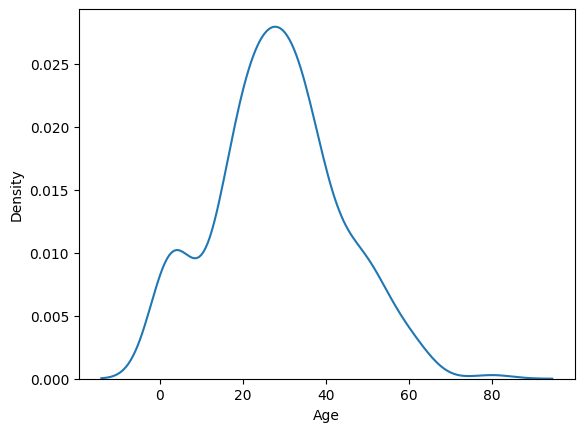

In [207]:
sv_df = df.loc[df['Survived'] == 1, 'Age']
sns.kdeplot(sv_df)


<AxesSubplot: xlabel='Survived', ylabel='Age'>

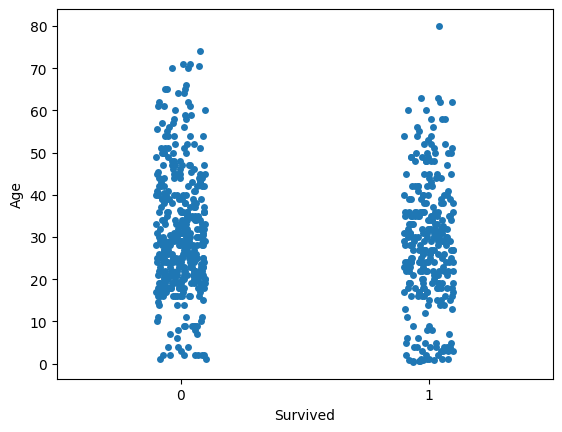

In [227]:
sns.stripplot(data=df, x= 'Survived', y = 'Age') #stripplot으로 보면 잘 안보인다.

<AxesSubplot: xlabel='Survived', ylabel='Age'>

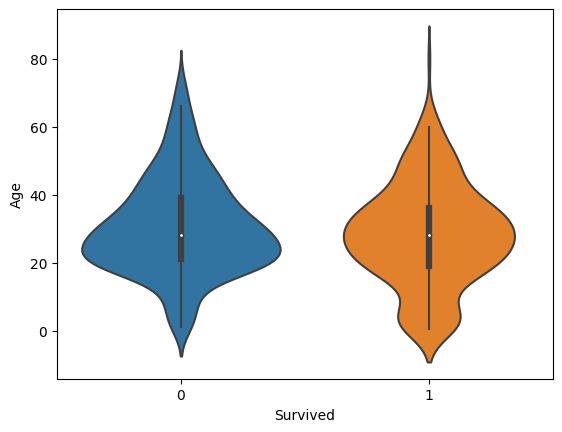

In [228]:
sns.violinplot(data=df, x= 'Survived', y = 'Age') #비슷비슷하다. 

In [212]:
df.corr().loc['Age','Survived'] #나이와 생존율은 반비례 성질을 가짐을 알수있음 

/var/folders/5v/qstscrlx4tsddzht4m9xgdcm0000gn/T/ipykernel_95908/2726686445.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().loc['Age','Survived']


-0.07722109457217756

나이보다 성별이 생존율에 더 많은 영향을 미친다.

/var/folders/5v/qstscrlx4tsddzht4m9xgdcm0000gn/T/ipykernel_95908/3756868624.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True) #d아래에 math/reading/writing score에 대한 상관계수를 그림으로 볼 수 있다.


<AxesSubplot: >

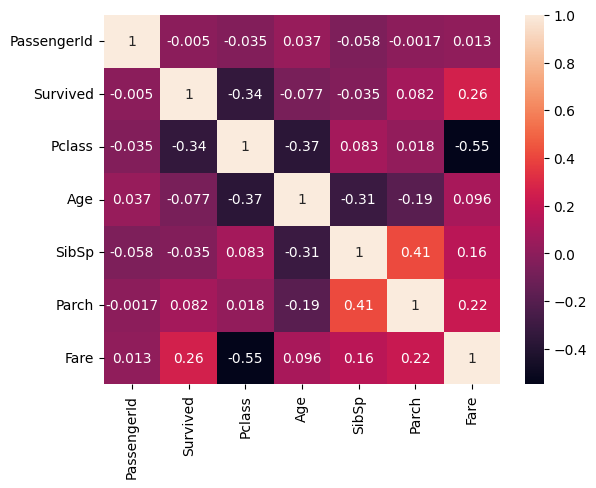

In [220]:
df = pd.read_csv('./data/titanic.csv') 
sns.heatmap(df.corr(), annot= True) #d아래에 math/reading/writing score에 대한 상관계수를 그림으로 볼 수 있다.


<AxesSubplot: xlabel='Survived', ylabel='Age'>

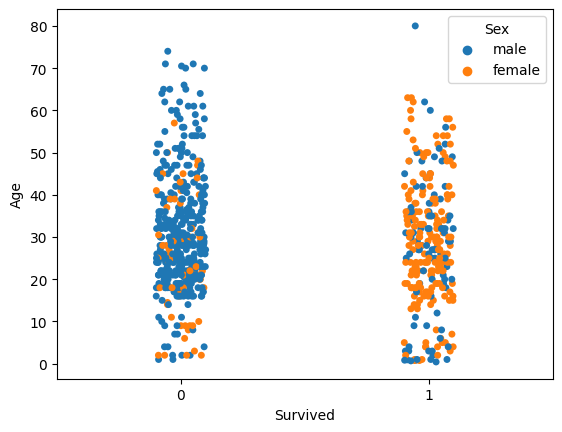

In [230]:
sns.stripplot(data= df, x= 'Survived', y = 'Age', hue='Sex') #성별이 의존도가 높은 것을 알 수 있다. 